# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
#
#
#placeholder for future dependencies

In [ ]:
#config variables (aka constants)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
api_key = weather_api_key  #changing name to make it shorter.  The prefix is needed in the config file to distinguish from other keys

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
#initialize a list to hold data for each city
city_weather = [] 
#need iterator to track number of cities for print log
i=0

#loop through each city in cities list, and pull data
for city in cities:      #all cities. comment out this line and uncomment below to test
#for i in range(3,7):         ###testing using iterator in case troubleshooting is needed
    city=cities[i]
    #print out logging msg because requirements called for it. 
                #Note - requirements say to print log msgs but has no mention of saving the log to a file.
    print(f'Retreiving Data for city at index {i}, named {city}')
    #generate API call string
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    
    #make request
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    
    if weather_json['cod']==200:   #loop will error if city not found, need to do something else if response code != 200
        #pull relevant values
        city_id        = weather_json['id']
        city_name      = weather_json['name']
        cloudiness_pct = weather_json['clouds']['all']
        country_cd     = weather_json['sys']['country']
        date           = weather_json['dt']
        humidity       = weather_json['main']['humidity']
        city_lat       = weather_json['coord']['lat']
        city_lng       = weather_json['coord']['lon']
        max_temp       = weather_json['main']['temp_max']
        wind_speed     = weather_json['wind']['speed']


        #Store data in list of dictionaries    
        city_weather.append( {
                         "city_id":city_id
                        ,"city_name": city_name
                        ,"cloudiness_pct":cloudiness_pct
                        ,"country_cd":country_cd
                        ,"date":date
                        ,"humidity": humidity
                        ,"city_lat":city_lat
                        ,"city_lng":city_lng
                        ,"max_temp":max_temp
                        ,"wind_speed":wind_speed
                       
                       })    
        print(f'Finished retreiving Data for city at index {i}, named {city}')
        #increment iterator
        i += 1
    else:
        print(f'Did not find {city} in OpenWeather, response={weather_json}. Skipping...')
        i+=1
print(f'Done! Successfully retrieved data for {len(city_weather)} cities.')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
df = pd.DataFrame(city_weather)
df.head()

In [ ]:
#Not called for in requirements but I want to read the date anyway.
df['date_time'] = pd.to_datetime(df['date'], unit='s')
df.head()

In [ ]:
df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
# https://stackoverflow.com/questions/21800169/python-pandas-get-index-of-rows-which-column-matches-certain-value

idx = df.index[df['humidity']>100]


# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# the if...else logic is not really necessary, but the instructions say 
# to skip the cleaning step if no cities show >100% humidity. The if condition, when satisfied, will skip the cleaning step.
# in testing with just the else clause with no logic, if len(idx)==0, then the df.drop() method will return
# a copy of the original dataframe unaltered.

if len(idx)==0:
    print(f'No cities show greater than 100% humidity')
    clean_city_data = df
else:
    clean_city_data = df.drop(labels=idx, axis='index', inplace=False, )

In [3]:
clean_city_data.head()

,Unnamed: 0,city_id,city_name,cloudiness_pct,country_cd,date,humidity,city_lat,city_lng,max_temp,wind_speed,date_time
0,0,2194098,Ahipara,61,NZ,1621361484,77,-35.1667,173.1667,59.14,11.16,2021-05-18 18:11:24
1,1,2027296,Aykhal,100,RU,1621361484,97,66.0000,111.5000,25.03,7.65,2021-05-18 18:11:24
2,2,5312476,Safford,1,US,1621361484,17,32.8340,-109.7076,83.32,18.41,2021-05-18 18:11:24
3,3,2263905,Ribeira Brava,1,PT,1621361485,60,32.6500,-17.0667,75.70,3.98,2021-05-18 18:11:25
4,4,2155415,New Norfolk,86,AU,1621361485,76,-42.7826,147.0587,51.91,1.99,2021-05-18 18:11:25


In [2]:
######for testing only, should be deleted before submission#####
clean_city_data = pd.read_csv('output/cities.csv')
print(len(clean_city_data))

591


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [5]:
# note: the variable names 'alpha' and 'beta' are meant to correspond 
# to the linear regression y-intercept, and slope, respectively, 
# as in y=beta*x+alpha




#
# plt.plot(x_, y_predict, color='r')
# plt.show()

independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['max_temp']
#to-do: Find documentation on linregress function
beta, alpha, r, p, stderr=linregress(independent_variable, dependent_variable)
y_predict = beta*independent_variable + alpha

In [6]:
type(independent_variable)

pandas.core.series.Series

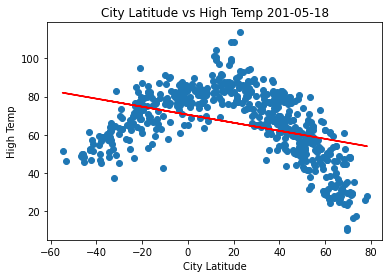

In [7]:
plt.plot(independent_variable, y_predict, color='r')
plt.scatter(independent_variable, dependent_variable)
plt.title("City Latitude vs High Temp 201-05-18")
plt.xlabel('City Latitude')
plt.ylabel('High Temp')
plt.savefig('fig1.png')
plt.show()

In [9]:
# Function definition to linear regress two series that form x,y values, labels, and title
# DEPENDECIES: scipystats.linregress; matplotlib.pyplot as plt

def linregr_scatter  (independent_variable
                    ,dependent_variable   
                    ,x_label              
                    ,y_label              
                    ,chart_title):

    
#Decided to keep r & p values for future use    
    beta, alpha, r, p, stderr=linregress(independent_variable, dependent_variable)
    y_predict = beta*independent_variable + alpha
    
    chart_dt = '2021-05-18'  ###date for which weather data were gathered

    plt.plot(independent_variable, y_predict, color='r')
    plt.scatter(independent_variable, dependent_variable)
    plt.title(chart_title + " "+chart_dt)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(f'output/images/{y_label}.png')  #to-do: generalize this, maybe pass outfile path as argument? also, error trapping in case user tries to save same filename >1 time
    plt.show()

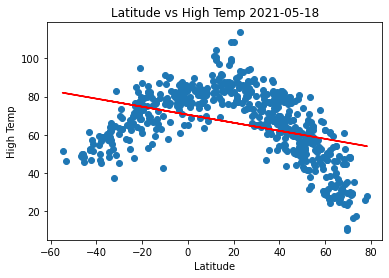

In [10]:
# test - should generate identical chart to the above:
independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['max_temp']
x_label = 'Latitude'
y_label = 'High Temp'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

## Latitude vs. Humidity Plot

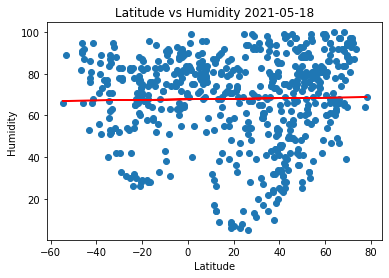

In [11]:
independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

## Latitude vs. Cloudiness Plot

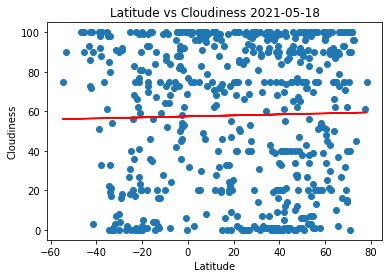

In [12]:
independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['cloudiness_pct']
x_label = 'Latitude'
y_label = 'Cloudiness'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

## Latitude vs. Wind Speed Plot

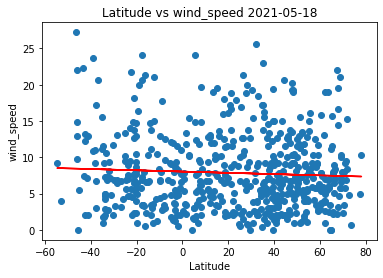

In [13]:
independent_variable = clean_city_data['city_lat']
dependent_variable   = clean_city_data['wind_speed']
x_label = 'Latitude'
y_label = 'wind_speed'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

### Analysis:
* Only significant relationship among the above plots is that temperature increases as latitude approaches about 20 degrees. No discernible relationship appears for wind, humidity, nor cloudiness. 

## Linear Regression

In [14]:
# extract data from clean_city_data into separate N and S Hemisphere frames
df_NH = clean_city_data[clean_city_data['city_lat']>=0] #decided zero (equator) goes in North Hemisphere because by definition South Hemisphere is where lat<0
df_SH = clean_city_data[clean_city_data['city_lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

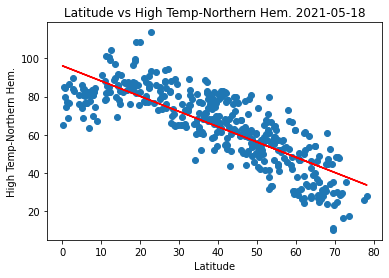

In [15]:
independent_variable = df_NH['city_lat']
dependent_variable   = df_NH['max_temp']
x_label = 'Latitude'
y_label = 'High Temp-Northern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

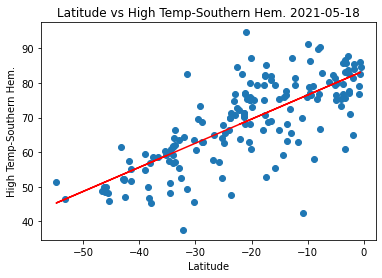

In [16]:
independent_variable = df_SH['city_lat']
dependent_variable   = df_SH['max_temp']
x_label = 'Latitude'
y_label = 'High Temp-Southern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

#### Observations: 
although there is high variance within the error terms (some dots way off the line), the data appear to show linear relationships between latitude and temperature.  The relationship is more curved (parametric) if both hemispheres are considered together

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

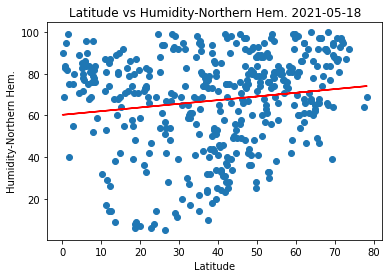

In [17]:
independent_variable = df_NH['city_lat']
dependent_variable   = df_NH['humidity']
x_label = 'Latitude'
y_label = 'Humidity-Northern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

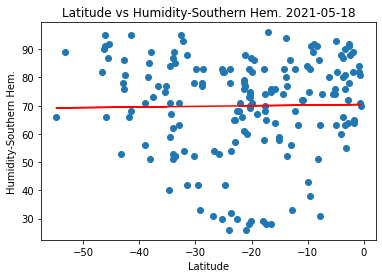

In [18]:
independent_variable = df_SH['city_lat']
dependent_variable   = df_SH['humidity']
x_label = 'Latitude'
y_label = 'Humidity-Southern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

#### Observations
* no discernible relationship exists, as shown by the almost uniform distribution of points on the scatterplot, and the nearly horizontal regression lines.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

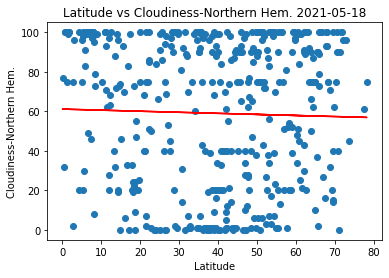

In [19]:
independent_variable = df_NH['city_lat']
dependent_variable   = df_NH['cloudiness_pct']
x_label = 'Latitude'
y_label = 'Cloudiness-Northern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

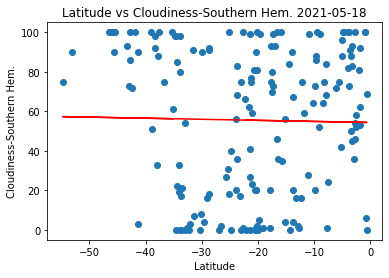

In [20]:
independent_variable = df_SH['city_lat']
dependent_variable   = df_SH['cloudiness_pct']
x_label = 'Latitude'
y_label = 'Cloudiness-Southern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

#### Observations
* no discernible relationship exists, as shown by the almost uniform distribution of points on the scatterplot, and the nearly horizontal regression lines.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

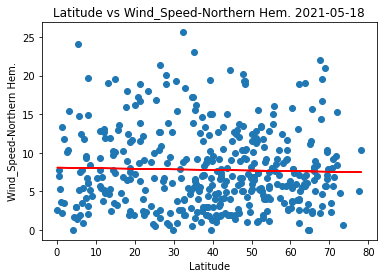

In [21]:
independent_variable = df_NH['city_lat']
dependent_variable   = df_NH['wind_speed']
x_label = 'Latitude'
y_label = 'Wind_Speed-Northern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

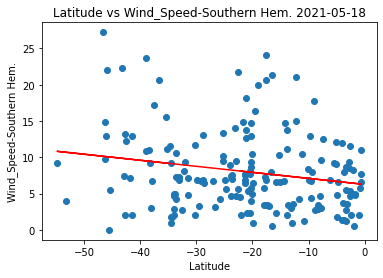

In [22]:
independent_variable = df_SH['city_lat']
dependent_variable   = df_SH['wind_speed']
x_label = 'Latitude'
y_label = 'Wind_Speed-Southern Hem.'
chart_title = f'{x_label} vs {y_label}'

linregr_scatter(independent_variable, dependent_variable, x_label, y_label, chart_title)

#### Observations
* no discernible relationship exists, as shown by the almost uniform distribution of points on the scatterplot, and the nearly horizontal regression lines.